PROJECT 4 
- 쇼핑몰 후기 감성 분석
- 말뭉치를 긍정 / 부정 으로 감성 예측

< 부족했던 점 - 나중에 다시 해보고 싶은 점 >

데이터 크롤링   
 -> 나중에 다시 시도해보기
 -> 적절할 사이트를 선택해야함
 -> 제품 하나에 대해서 밖에 못했음..

데이터 선정
 -> https://bab2min.tistory.com/657
 -> 이 분이 크롤링하여 올려주신 데이터 사용!

데이터 정보
 -> https://github.com/bab2min/corpus/tree/master/sentiment
 -> 네이버 쇼핑몰 후기
 -> 200,000 개
 -> 의류, 잡화, 미용, 가전, 식품 등 다양한 분야 물건 포함
 -> 물건 품질, 배송 속도, 실물과 온라인 간의 괴리 등이 있다고 함

In [66]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install matplotlib

# !pip install mecab-ko
# !pip install konlpy

# # bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

# !pip3 install Mecab
# !pip install mecab-python3

# !pip install nltk

# !pip install seaborn
# !pip install graphviz

# !pip install wordcloud

# !pip install tensorflow

In [67]:
import urllib.request
import numpy as np
import pandas as pd
## conda install -n pj4 ipykernel --update-deps --force-reinstall

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from konlpy.tag import Mecab


In [68]:
## 깃헙에서 텍스트 데이터 뽑아오기

fork_link = 'https://raw.githubusercontent.com/yh-kim05/corpus/master/sentiment/naver_shopping.txt'
urllib.request.urlretrieve(fork_link, filename="ratings_total.txt")


('ratings_total.txt', <http.client.HTTPMessage at 0x7f87df30b450>)

In [69]:
data = pd.read_table('ratings_total.txt')

data

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


In [70]:
## column name 추가

print(type(data))

#data.columns(['ratings', 'review'])   <- 이렇게 하면 첫번째 줄 데이터가 손실됨..
data = pd.read_table('ratings_total.txt', names = ['ratings', 'review'])

data

<class 'pandas.core.frame.DataFrame'>


,ratings,review
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [71]:
## rating 이 1,2,3 이면 -> 부정 (0)
## rating 이 4,5 이면 -> 긍정 (1)
## 위 기준으로 label column 생성

data['label'] = np.where(data['ratings'] <= 3, 0, 1)

data

,ratings,review,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [72]:
## duplicated 확인

print(data.duplicated().any())
print(data['review'].duplicated().any())

data[data['review'].duplicated()]

# 리뷰만 봤을 때 내용이 같은 리뷰는 있지만 ratings 까지 같은 데이터는 없다.
# 따라서, 중복 데이터라고 보지 않고 keep 하기로 했다.

False
True


,ratings,review,label
10958,5,2022년까지 넉넉함,1
20907,1,배송이느려 페인트칠 다하고 왔네요,0
49674,1,배송이 너무 늦어요,0
52247,2,생각보다 별로네요~,0
63566,2,아직 잘 모르겠어요...,0
...,...,...,...
195857,2,딱 돈만큼 하는 제품,0
196291,2,배송이 느려요,0
197220,1,정사이즈보다 조금더 크게시켜야할듯,0
198330,2,배송도 빠르고 좋습니다,0


In [73]:
## duplicated 제거

# 우선은 없음!

### 나중에, 리뷰 겹치는 데이터 지우고 결과 비교해보기!

In [74]:
## NULL 값 확인

data.isnull().values.any()

False

In [75]:
## Split Train, Test data into 8:2

## 토큰화 후에 분류해야함!
# X = data['review']
# y = data['label']

train_d, test_d = train_test_split(data, test_size=0.2, train_size=0.8)

print(len(train_d))
train_d.head()

160000


,ratings,review,label
137666,5,물기흡수가 잘되네요 맘에들어요,1
173924,2,생각보다 품질이 별로입니다 하지만 잘 쓸께요 배송은 매우 빠릅니다.,0
137697,1,직접 밥아보니 속이 단단한 스티로폼인게 보이네요 표피도 테이프로 붙인거네요 허접하네요,0
150200,2,아래 끼우는 망 홀더가 벌써 다 깨졌습니다 두번 썼어요. 말이 됩니까? 혹시나 싶어...,0
15715,2,벌레가 많았어요ㅜ,0


In [76]:
print(len(test_d))
test_d.head()

40000


,ratings,review,label
26086,1,별효과없는듯;;;;;;,0
131991,1,월요일 밤에 주문해서 수요일날 올 확률이83%라고 했는데 금요일날 왔네요. 배송이 ...,0
165492,5,재구매 늘 만족하고 재구매하고있어요~^^,1
9852,2,"그닥 분명 거치대는 고정이 생명인데,,,양면테잎의 문제인가요? 핸드폰은 잘 물고 있...",0
72585,5,더젤이 셀프네일하기 가성비가 정말 좋아요 새롬게 리뉴얼된 케이스가 훨씬 이쁘네요,1


1    80139
0    79861
Name: label, dtype: int64


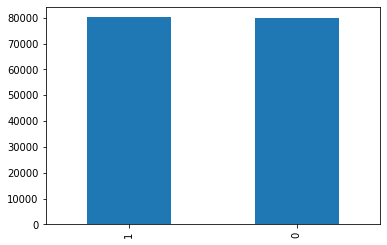

In [77]:
## label 분포/비율 확인

print(train_d['label'].value_counts())

train_d['label'].value_counts().plot(kind='bar')

# 비율 약 반반 좋은 비율을 보이고 있다.

In [78]:
## 데이터 정제
## 정규표현식 - 특수기호 제거

train_d['review'] = train_d['review'].str.replace("[^ㄱ-힣 ]", "")
train_d.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,ratings,review,label
137666,5,물기흡수가 잘되네요 맘에들어요,1
173924,2,생각보다 품질이 별로입니다 하지만 잘 쓸께요 배송은 매우 빠릅니다,0
137697,1,직접 밥아보니 속이 단단한 스티로폼인게 보이네요 표피도 테이프로 붙인거네요 허접하네요,0
150200,2,아래 끼우는 망 홀더가 벌써 다 깨졌습니다 두번 썼어요 말이 됩니까 혹시나 싶어서 ...,0
15715,2,벌레가 많았어요ㅜ,0


In [79]:
## 특수기호 지우고 혹시 리뷰가 null 값이 생겼는지 확인
print(train_d['review'].isnull().any())

## 혹시 리뷰가 빈칸이 되었는지 그래서 null 값이 되었나 확인
train_d['review'].replace("", np.nan, inplace=True)
train_d['review'].isnull().any()

False


False

In [80]:
test_d['review'] = test_d['review'].str.replace("[^ㄱ-힣 ]", "")
test_d['review'].replace("", np.nan, inplace=True)
test_d.isnull().any()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


ratings    False
review     False
label      False
dtype: bool

In [81]:
## 토큰화
## 형태소 분석기 Mecab 을 사용!

# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

from konlpy.tag import Mecab

mecab = Mecab()


In [82]:
## 토큰화

train_d['tokens'] = train_d['review'].apply(mecab.morphs)
test_d['tokens'] = test_d['review'].apply(mecab.morphs)

train_d['tokens']

137666                   [물기, 흡수, 가, 잘, 되, 네요, 맘, 에, 들, 어요]
173924    [생각, 보다, 품질, 이, 별로, 입니다, 하지만, 잘, 쓸께요, 배송, 은, 매...
137697    [직접, 밥, 아, 보, 니, 속, 이, 단단, 한, 스티로폼, 인, 게, 보이, ...
150200    [아래, 끼우, 는, 망, 홀더, 가, 벌써, 다, 깨졌, 습니다, 두, 번, 썼,...
15715                                  [벌레, 가, 많, 았, 어요, ㅜ]
                                ...                        
142279                   [정말, 안, 터졌, 어요, 데이터, 도, 너무, 느리, 고]
74152     [디자인, 은, 괜찮, 은, 대, 사이즈, 가, 가격, 에, 비해, 너무, 작, 고...
77511                  [재, 구매, 항상, 구매, 해서, 쓰, 는, 물건, 이, 에요]
69921     [너, 우, 헐겁, 게, 휴지, 가, 감겨, 있, 네요, 재, 구매, 는, 없, 을...
70896                       [장, 인, 줄, 알, 았, 는데, 장, 이, 더라구요]
Name: tokens, Length: 160000, dtype: object

In [83]:
train_d.head()

,ratings,review,label,tokens
137666,5,물기흡수가 잘되네요 맘에들어요,1,"[물기, 흡수, 가, 잘, 되, 네요, 맘, 에, 들, 어요]"
173924,2,생각보다 품질이 별로입니다 하지만 잘 쓸께요 배송은 매우 빠릅니다,0,"[생각, 보다, 품질, 이, 별로, 입니다, 하지만, 잘, 쓸께요, 배송, 은, 매..."
137697,1,직접 밥아보니 속이 단단한 스티로폼인게 보이네요 표피도 테이프로 붙인거네요 허접하네요,0,"[직접, 밥, 아, 보, 니, 속, 이, 단단, 한, 스티로폼, 인, 게, 보이, ..."
150200,2,아래 끼우는 망 홀더가 벌써 다 깨졌습니다 두번 썼어요 말이 됩니까 혹시나 싶어서 ...,0,"[아래, 끼우, 는, 망, 홀더, 가, 벌써, 다, 깨졌, 습니다, 두, 번, 썼,..."
15715,2,벌레가 많았어요ㅜ,0,"[벌레, 가, 많, 았, 어요, ㅜ]"


In [84]:
##  불용어 지정

stop_words = ['도', '은', '는', '이', '가', '다', '의', '에', '고', '게', '을', '를', '과', '와', '았', '있', '요'
                ,'거', '어', '아', '지', '했', '아요', '어요', '네요']

In [85]:
## 필요없는 토큰 (불용어) 제거

train_d['tokens'] = train_d['tokens'].apply(lambda x: [i for i in x if i not in stop_words])
test_d['tokens'] = test_d['tokens'].apply(lambda x: [i for i in x if i not in stop_words])

train_d.head()

,ratings,review,label,tokens
137666,5,물기흡수가 잘되네요 맘에들어요,1,"[물기, 흡수, 잘, 되, 맘, 들]"
173924,2,생각보다 품질이 별로입니다 하지만 잘 쓸께요 배송은 매우 빠릅니다,0,"[생각, 보다, 품질, 별로, 입니다, 하지만, 잘, 쓸께요, 배송, 매우, 빠릅니다]"
137697,1,직접 밥아보니 속이 단단한 스티로폼인게 보이네요 표피도 테이프로 붙인거네요 허접하네요,0,"[직접, 밥, 보, 니, 속, 단단, 한, 스티로폼, 인, 보이, 표피, 테이프, ..."
150200,2,아래 끼우는 망 홀더가 벌써 다 깨졌습니다 두번 썼어요 말이 됩니까 혹시나 싶어서 ...,0,"[아래, 끼우, 망, 홀더, 벌써, 깨졌, 습니다, 두, 번, 썼, 말, 됩니까, ..."
15715,2,벌레가 많았어요ㅜ,0,"[벌레, 많, ㅜ]"


In [86]:
## 긍정 / 부정 단어 모으기

neg_words = np.hstack(train_d[train_d.label == 0]['tokens'].values)
pos_words = np.hstack(train_d[train_d.label == 1]['tokens'].values)

print(neg_words)
print(pos_words)

['생각' '보다' '품질' ... '는데' '장' '더라구요']
['물기' '흡수' '잘' ... '선물' '로' '샀어요']


In [87]:
## 긍정 / 부정 단어 빈도 수 체크

from collections import Counter

neg_word_count = Counter(neg_words)
print(neg_word_count.most_common(20))

pos_word_count = Counter(pos_words)
print(pos_word_count.most_common(20))

[('하', 31721), ('는데', 21456), ('안', 21046), ('너무', 14185), ('한', 11388), ('좋', 10350), ('배송', 10222), ('같', 9596), ('구매', 9328), ('없', 9316), ('되', 9009), ('습니다', 8954), ('그냥', 8887), ('잘', 8534), ('않', 8431), ('나', 8065), ('만', 7281), ('로', 7160), ('것', 6865), ('기', 6853)]
[('좋', 42233), ('하', 33988), ('잘', 19889), ('구매', 17353), ('습니다', 14449), ('배송', 13076), ('는데', 12489), ('합니다', 10558), ('먹', 10430), ('재', 9937), ('너무', 9054), ('같', 8378), ('한', 7908), ('만족', 7892), ('쓰', 6685), ('기', 6632), ('들', 6517), ('사용', 6234), ('해서', 5823), ('되', 5568)]


In [88]:
## Counter로 하면 그래프가 안그려진당

import nltk

n_twords = nltk.Text(neg_words)
print(n_twords.vocab().most_common(10))

p_twords = nltk.Text(pos_words)
print(p_twords.vocab().most_common(10))

[('하', 31721), ('는데', 21456), ('안', 21046), ('너무', 14185), ('한', 11388), ('좋', 10350), ('배송', 10222), ('같', 9596), ('구매', 9328), ('없', 9316)]
[('좋', 42233), ('하', 33988), ('잘', 19889), ('구매', 17353), ('습니다', 14449), ('배송', 13076), ('는데', 12489), ('합니다', 10558), ('먹', 10430), ('재', 9937)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_

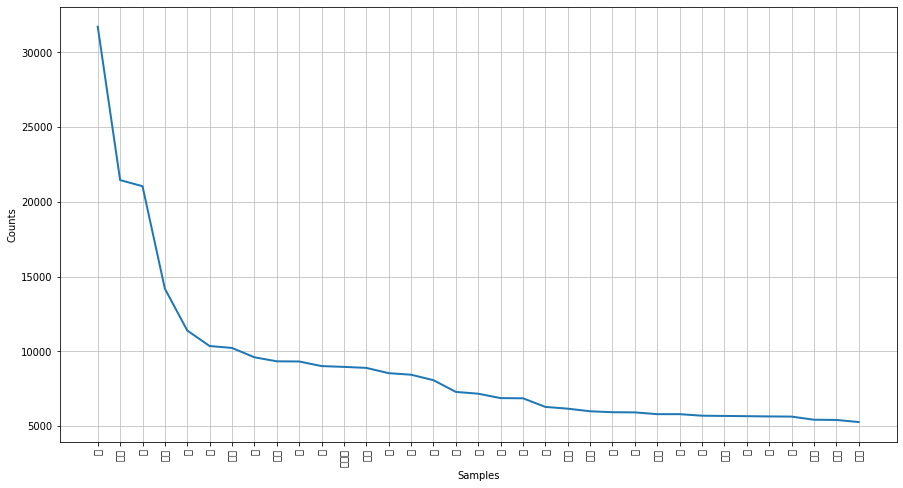

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import rc

# 한글 폰트 사용을 위해서 세팅
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(15,8))
n_twords.plot(35)
plt.show();

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_

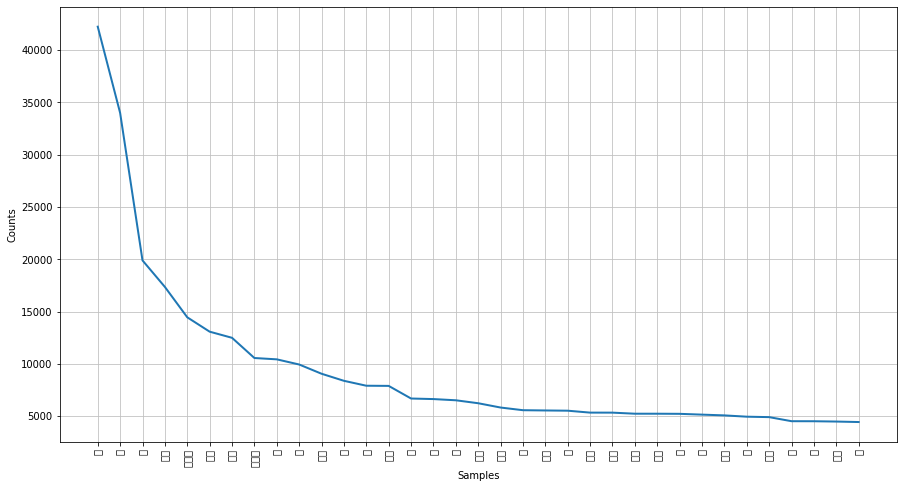

In [90]:
plt.figure(figsize=(15,8))
p_twords.plot(35)
plt.show();

In [91]:
# from wordcloud import WordCloud

# wc = WordCloud(font_path='AppleGothic', width=1000, height=500, scale=2.0, max_font_size=250)
# neg_gen = wc.generate_from_frequencies(neg_word_count)
# plt.figure()
# plt.imshow(neg_gen);

In [92]:
# wc = WordCloud(font_path='AppleGothic', width=1000, height=500, scale=2.0, max_font_size=250)
# pos_gen = wc.generate_from_frequencies(pos_word_count)
# plt.figure()
# plt.imshow(pos_gen);

In [93]:
## 데이터 X, y split

X_train = train_d['tokens'].values
y_train = train_d['label'].values
X_test= test_d['tokens'].values
y_test = test_d['label'].values

X_train

array([list(['물기', '흡수', '잘', '되', '맘', '들']),
       list(['생각', '보다', '품질', '별로', '입니다', '하지만', '잘', '쓸께요', '배송', '매우', '빠릅니다']),
       list(['직접', '밥', '보', '니', '속', '단단', '한', '스티로폼', '인', '보이', '표피', '테이프', '로', '붙인', '허접', '하']),
       ..., list(['재', '구매', '항상', '구매', '해서', '쓰', '물건', '에요']),
       list(['너', '우', '헐겁', '휴지', '감겨', '재', '구매', '없', '듯', '하']),
       list(['장', '인', '줄', '알', '는데', '장', '더라구요'])], dtype=object)

In [94]:
# !pip install --upgrade appnope

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [96]:
vocab_size = 22000

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [97]:
max_len = 80

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [98]:
import tensorflow as tf

In [99]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [100]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [101]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2732 - acc: 0.8971
Epoch 1: val_acc improved from -inf to 0.91572, saving model to best_model.h5
2000/2000 [==============================] - 259s 128ms/step - loss: 0.2732 - acc: 0.8971 - val_loss: 0.2296 - val_acc: 0.9157
Epoch 2/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2180 - acc: 0.9206
Epoch 2: val_acc improved from 0.91572 to 0.92037, saving model to best_model.h5
2000/2000 [==============================] - 253s 126ms/step - loss: 0.2180 - acc: 0.9206 - val_loss: 0.2190 - val_acc: 0.9204
Epoch 3/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2015 - acc: 0.9272
Epoch 3: val_acc improved from 0.92037 to 0.92372, saving model to best_model.h5
2000/2000 [==============================] - 253s 127ms/step - loss: 0.2015 - acc: 0.9272 - val_loss: 0.2129 - val_acc: 0.9237
Epoch 4/15
2000/2000 [==============================] - ETA: 0s - loss: 0.1903 - acc: 0.9323
Epoch 4

In [103]:
from tensorflow.keras.models import load_model

loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: ", (loaded_model.evaluate(X_test, y_test)[1]))

1250/1250 [==============================] - 27s 21ms/step - loss: 0.2163 - acc: 0.9228

 테스트 정확도:  0.9228249788284302


In [104]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')